<a href="https://colab.research.google.com/github/tugbaoguncmert/Iris-Species-Prediction/blob/main/Iris_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Import modules**



In [190]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Loading the dataset**

In [191]:
data = pd.read_csv("https://raw.githubusercontent.com/tugbaoguncmert/Iris-Species-Prediction/main/Iris_Dataset.csv")

**Preprocessing-->Data Inspection and Descriptive Statistics**

In [192]:
data.shape

(170, 7)

In [193]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


**Dropping unnecessary columns**

In [195]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [196]:
data.columns[0],

('Unnamed: 0',)

In [197]:
data.drop(labels=[data.columns[0]], axis=1, inplace=True)

In [198]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [199]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,170.000000,167.000000,169.000000,166.000000,168.000000
mean,84.500000,5.826347,3.072781,3.707229,1.180357
std,49.218899,0.827189,0.447578,1.789382,0.765049
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,42.250000,5.100000,2.800000,1.500000,0.300000
50%,84.500000,5.800000,3.000000,4.300000,1.300000
75%,126.750000,6.400000,3.400000,5.100000,1.800000
max,169.000000,7.900000,4.400000,6.900000,2.500000


In [200]:
data.groupby("Species").agg(["mean","std","min","max"])

Id                       ... PetalWidthCm                    
                  mean        std  min  max  ...         mean       std  min  max
Species                                      ...                                 
Iris-setosa       29.5  17.464249    0   59  ...     0.300000  0.295950  0.1  2.1
Iris-versicolor   86.5  15.732133   60  113  ...     1.314815  0.235049  0.4  1.8
Iris-virginica   141.5  16.309506  114  169  ...     1.992727  0.353215  0.4  2.5

[3 rows x 20 columns]

**Clearing NaN Value**

In [201]:
data.tail(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
150,150,5.8,2.7,5.1,1.9,Iris-virginica
151,151,6.8,3.2,5.9,2.3,Iris-virginica
152,152,6.7,3.3,5.7,2.5,Iris-virginica
153,153,6.3,2.5,5.0,1.9,Iris-virginica
154,154,6.3,2.7,4.9,1.8,Iris-virginica
155,155,6.5,3.0,5.2,2.0,Iris-virginica
156,156,6.2,3.4,5.4,2.3,Iris-virginica
157,157,5.9,3.0,5.1,1.8,Iris-virginica
158,158,6.4,2.8,5.6,2.2,Iris-virginica
159,159,7.7,3.8,6.7,2.2,Iris-virginica


In [202]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [203]:
for column in data.columns[1:-1]:
  data[column].fillna(value=data[column].mean(), inplace=True)

In [204]:
data.columns[1:-1]

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [205]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Exploratory Data Analysis and Visualization**

In [206]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


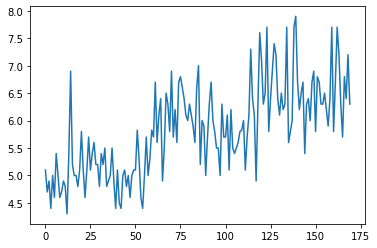

In [207]:
data["SepalLengthCm"].plot()

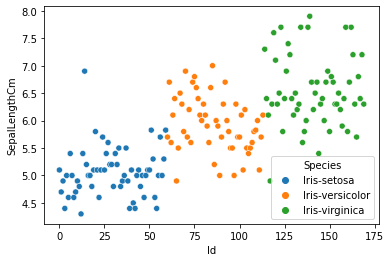

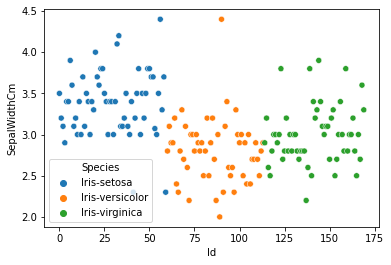

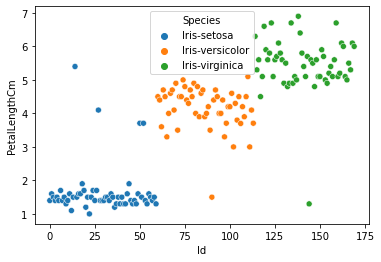

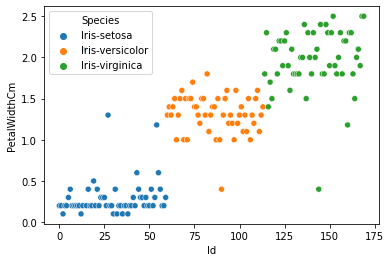

In [208]:
for column in data.columns[1:-1]:
  sns.scatterplot(data=data, x="Id",y=column ,hue="Species")
  plt.show()

**Outlier Detection** - 3 Sigma

In [209]:
selected_spec   = data[data["Species"] == "Iris-setosa"]
selected_column = selected_spec["SepalLengthCm"]

In [210]:
std = selected_column.std()
avg = selected_column.mean()

In [211]:
three_sigma_plus  = avg + (3*std)
three_sigma_minus = avg - (3*std)

In [212]:
selected_column[(selected_spec["SepalLengthCm"] > three_sigma_plus) | (selected_spec["SepalLengthCm"] < three_sigma_minus)].index

Int64Index([14], dtype='int64')

In [213]:
for column in data.columns[1:-1]:
  for spec in data["Species"].unique():
    selected_spec   = data[data["Species"] == spec]
    selected_column = selected_spec[column]

    std = selected_column.std()
    avg = selected_column.mean()

    three_sigma_plus  = avg + (3*std)
    three_sigma_minus = avg - (3*std)

    outliers = selected_column[(selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus)].index
    data.drop(outliers, inplace= True)
    print(column,spec,outliers)

SepalLengthCm Iris-setosa Int64Index([14], dtype='int64')
SepalLengthCm Iris-versicolor Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor Int64Index([90], dtype='int64')
SepalWidthCm Iris-virginica Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa Int64Index([27, 50, 52], dtype='int64')
PetalLengthCm Iris-versicolor Int64Index([], dtype='int64')
PetalLengthCm Iris-virginica Int64Index([144], dtype='int64')
PetalWidthCm Iris-setosa Int64Index([54], dtype='int64')
PetalWidthCm Iris-versicolor Int64Index([], dtype='int64')
PetalWidthCm Iris-virginica Int64Index([], dtype='int64')


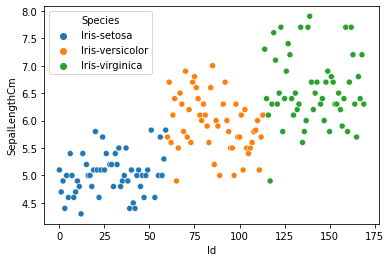

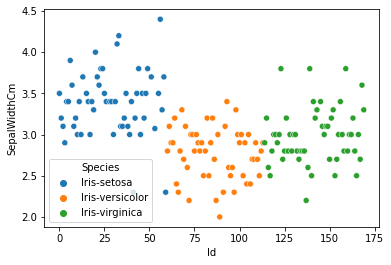

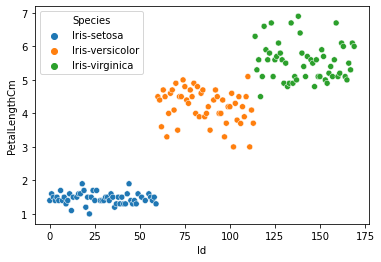

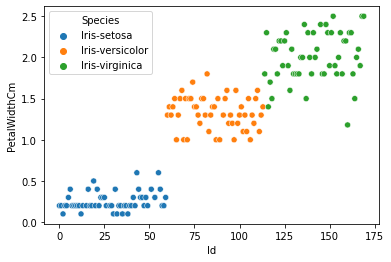

In [214]:
for column in data.columns[1:-1]:
  sns.scatterplot(data=data, x="Id",y=column ,hue="Species")
  plt.show()

**Outlier Detection** - IQR Quantile

In [215]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"] == spec]
        selected_column = selected_spec[column]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        
        iqr = q3 - q1
        
        minimum = q1 - (1.5 * iqr)
        maximum = q3 + (1.5 * iqr)
        
        print(column, spec, "| min= ", minimum, "max= ", maximum)
        
        max_idxs = data[(data["Species"] == spec) & (data[column] > maximum)].index
        print(max_idxs)
        min_idxs = data[(data["Species"] == spec) & (data[column] < minimum)].index
        print(min_idxs)
        
        data.drop(index=max_idxs, inplace=True)
        data.drop(index=min_idxs, inplace=True)

SepalLengthCm Iris-setosa | min=  4.199999999999999 max=  5.800000000000001
Int64Index([51, 59], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor | min=  4.549999999999999 max=  7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica | min=  5.15 max=  7.950000000000001
Int64Index([], dtype='int64')
Int64Index([117], dtype='int64')
SepalWidthCm Iris-setosa | min=  2.35 max=  4.35
Int64Index([56], dtype='int64')
Int64Index([41], dtype='int64')
SepalWidthCm Iris-versicolor | min=  1.75 max=  3.75
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica | min=  2.1999999999999993 max=  3.8000000000000007
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa | min=  1.0999999999999996 max=  1.9000000000000004
Int64Index([], dtype='int64')
Int64Index([22], dtype='int64')
PetalLengthCm Iris-versicolor | min=  2.8500000000000005 max=  5.6499999999999995
Int64Index([],

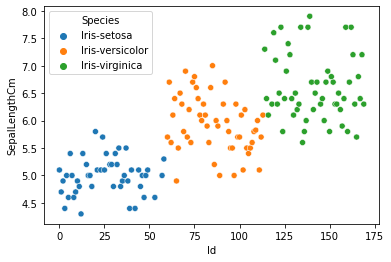

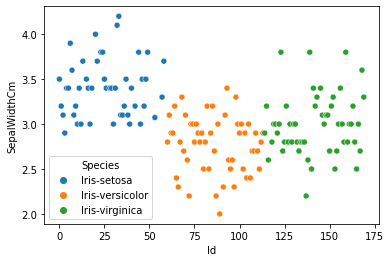

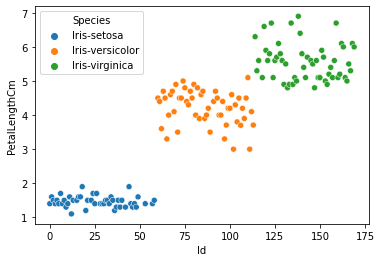

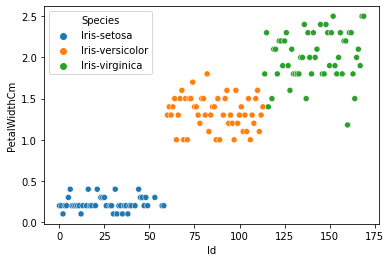

In [216]:
for column in data.columns[1:-1]:
    sns.scatterplot(data=data, x="Id", y=column, hue="Species")
    plt.show()